In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr

In [3]:
Pfizer_file = pd.read_csv('Pfizer.csv')
Pfizer_data = [float(x) for x in Pfizer_file['Open']]
Pfizer_time = pd.to_datetime(Pfizer_file['Date'])

Moderna_file = pd.read_csv('Moderna.csv')
Moderna_data = [float(x) for x in Moderna_file['Open']]
Moderna_time = pd.to_datetime(Moderna_file['Date'])

## Wykresy 

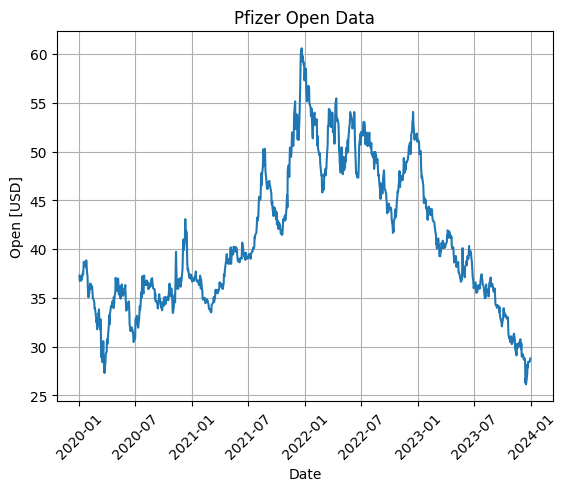

In [4]:
plt.plot(Pfizer_time, Pfizer_data)
plt.xlabel('Date')
plt.ylabel('Open [USD]')
plt.xticks(rotation=45)
plt.title('Pfizer Open Data')
plt.grid(True)
plt.savefig("data_pfizer.png")
plt.show()

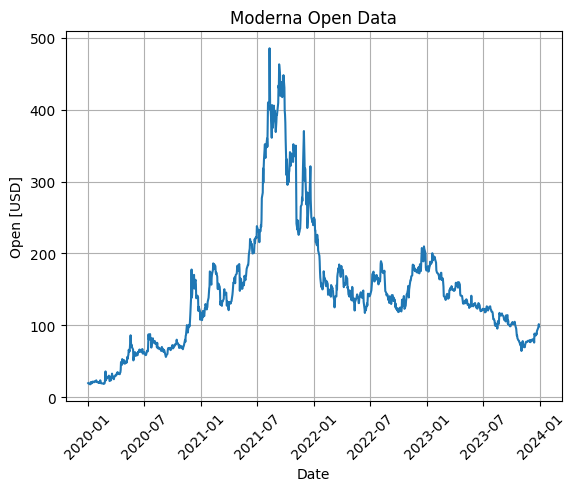

In [5]:
plt.plot(Moderna_time, Moderna_data)
plt.xlabel('Date')
plt.ylabel('Open [USD]')
plt.title('Moderna Open Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("data_moderna.png")
plt.show()

## Średnia

In [6]:
def arytmetyczna(data):
    return sum(data)/len(data)

def harmoniczna(data):

    suma = 0
    for i in range(len(data)):
        suma += 1/data[i]

    return len(data)/suma

def geometryczna(data):
    product = 1
    for i in range(len(data)):
        product *= data[i]

    return product**(1/len(data))

In [7]:
print("Srednia arytmetyczna Pfizer", arytmetyczna(Pfizer_data))
print("Srednia arytmetyczna Moderna", arytmetyczna(Moderna_data))

Srednia arytmetyczna Pfizer 40.96097044632205
Srednia arytmetyczna Moderna 147.19275533300208


In [8]:
print("Srednia harmoniczna Pfizer", harmoniczna(Pfizer_data))
print("Srednia harmoniczna Moderna", harmoniczna(Moderna_data))

Srednia harmoniczna Pfizer 39.69745171877357
Srednia harmoniczna Moderna 94.8250220800443


### Mediana

In [9]:
def mediana(data):
    data = sorted(data)
    if len(data) % 2 == 0:
        return (data[(len(data)//2)-1]+data[len(data)//2])/2
    else:
        return data[(len(data)//2)]

In [10]:
print("Mediana Pfizer", mediana(Pfizer_data))
print("Mediana Moderna", mediana(Moderna_data))

Mediana Pfizer 39.1499995
Mediana Moderna 137.675003


### Kwartyle

In [11]:
def kwartyle(data):
    data = sorted(data)
    if len(data) % 2 == 0:
        return mediana(data[:(len(data)//2)]), mediana(data[(len(data)//2):])
    else:
        return mediana(data[:((len(data)//2)+1)]), mediana(data[((len(data)//2)+1):])

In [12]:
print("Kwartyle Pfizer", kwartyle(Pfizer_data))
print("Kwartyle Moderna", kwartyle(Moderna_data))

Kwartyle Pfizer (35.493359, 47.41)
Kwartyle Moderna (82.050003, 173.509995)


### Rozstęp z próby

In [13]:
def rozstęp_z_próby(data):
    data = sorted(data)
    return data[len(data)-1] - data[0]

In [14]:
print("Rozstęp z próby Pfizer", rozstęp_z_próby(Pfizer_data))
print("Rozstęp z próby Moderna", rozstęp_z_próby(Moderna_data))

Rozstęp z próby Pfizer 34.469999
Rozstęp z próby Moderna 467.51


### Rozstęp międzykwartylowy

In [15]:
def rozstęp_międzykwartylowy(data):
    return kwartyle(data)[1] - kwartyle(data)[0]

In [16]:
print("Rozstęp międzykwartylowy Pfizer", rozstęp_międzykwartylowy(Pfizer_data))
print("Rozstęp międzykwartylowy Moderna", rozstęp_międzykwartylowy(Moderna_data))

Rozstęp międzykwartylowy Pfizer 11.916640999999998
Rozstęp międzykwartylowy Moderna 91.459992


### Wariancja

In [17]:
def wariancja(data):
    średnia = sum(data)/len(data)
    suma = 0
    for i in range(len(data)):
        różnica = data[i] - średnia
        suma += różnica**2
    return 1/(len(data)-1)*suma

In [18]:
print("Wariancja Pfizer", wariancja(Pfizer_data))
print("Wariancja Moderna", wariancja(Moderna_data))

Wariancja Pfizer 53.91583348751562
Wariancja Moderna 7585.404551655238


### Odchylenie standardowe

In [19]:
def odchylenie_standardowe(data):
    return np.sqrt(wariancja(data))

In [20]:
print("Odchylenie standardowe Pfizer", odchylenie_standardowe(Pfizer_data))
print("Odchylenie standardowe Moderna", odchylenie_standardowe(Moderna_data))

Odchylenie standardowe Pfizer 7.342740189296882
Odchylenie standardowe Moderna 87.09422800424399


### Histogramy

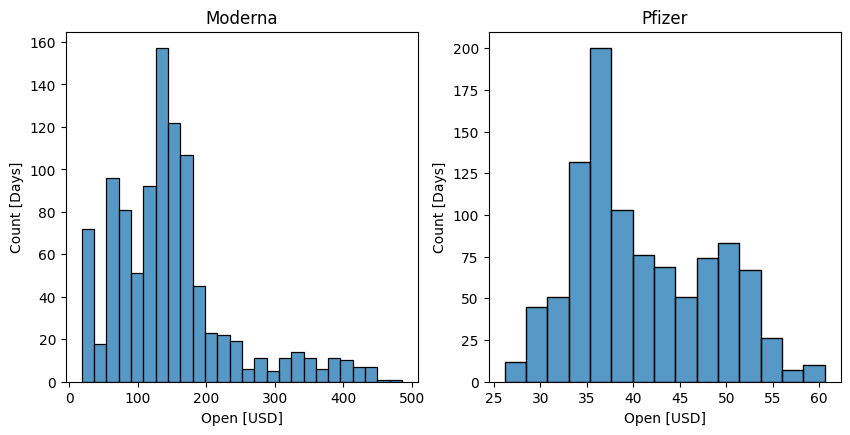

In [21]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
sns.histplot(Moderna_data)
plt.title("Moderna")
plt.xlabel('Open [USD]')
plt.ylabel('Count [Days]')

plt.subplot(2, 2, 2)
sns.histplot(Pfizer_data)
plt.title("Pfizer")
plt.xlabel('Open [USD]')
plt.ylabel('Count [Days]')

plt.show()

### Gęstości

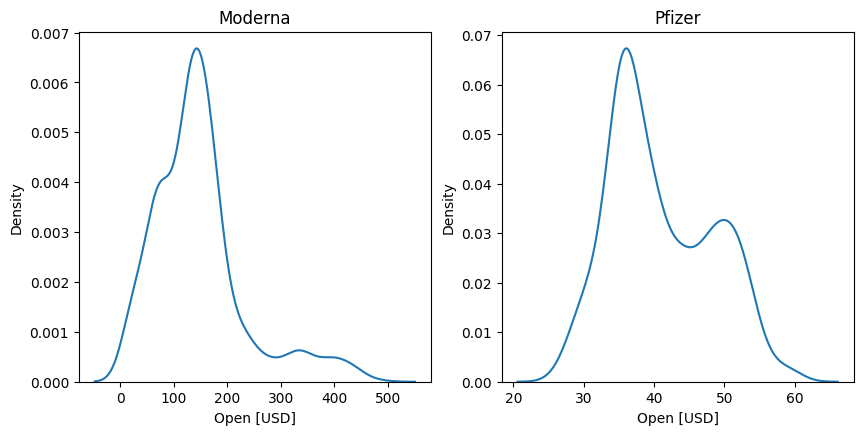

In [22]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
sns.kdeplot(Moderna_data)
plt.title("Moderna")
plt.xlabel('Open [USD]')

plt.subplot(2, 2, 2)
sns.kdeplot(Pfizer_data)
plt.title("Pfizer")
plt.xlabel('Open [USD]')

plt.show()

### Dystrybuanty

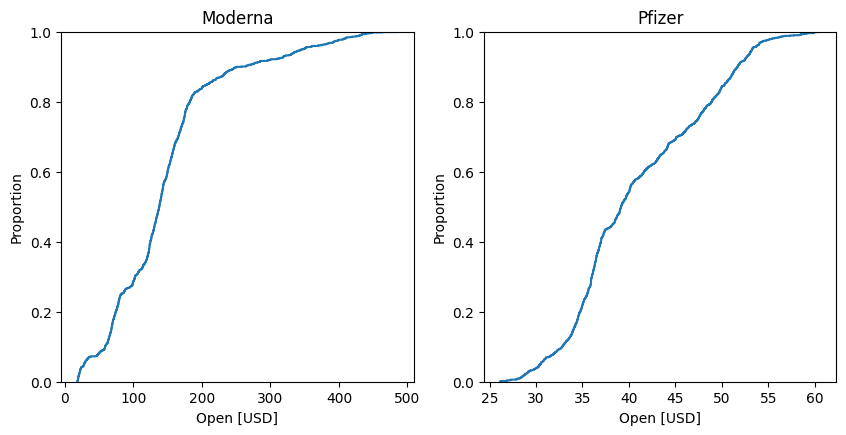

In [23]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
sns.ecdfplot(Moderna_data)
plt.title("Moderna")
plt.xlabel('Open [USD]')

plt.subplot(2, 2, 2)
sns.ecdfplot(Pfizer_data)
plt.title("Pfizer")
plt.xlabel('Open [USD]')

plt.show()

### Współczynnik korelacji Pearsona

In [24]:
Pearson1 = np.corrcoef(Pfizer_data, Moderna_data)[0, 1]

print("Współczynnik korelacji:", Pearson1)

Współczynnik korelacji: 0.5597391771349524


In [25]:
Pfizer_data = np.array(Pfizer_data)
Moderna_data = np.array(Moderna_data)
n = len(Moderna_data)

sum_multip = np.sum(Moderna_data * Pfizer_data)
sum_Moderna = np.sum(Moderna_data)
sum_Pfizer = np.sum(Pfizer_data)
sum_Moderna2 = np.sum(Moderna_data**2)
sum_Pfizer2 = np.sum(Pfizer_data**2)

Pearson2 = (n * sum_multip - sum_Moderna * sum_Pfizer) / np.sqrt((n * sum_Moderna2 - sum_Moderna**2) * (n * sum_Pfizer2 - sum_Pfizer**2))

print("Współczynnik korelacji:", Pearson2)

Współczynnik korelacji: 0.5597391771349518


### Współczynnik korelacji Spearmana?

In [26]:
Spearman = spearmanr(Pfizer_data, Moderna_data)[0]

print("Współczynnik korelacji:", Spearman)

Współczynnik korelacji: 0.732179642287608


### wykres rozrzutu

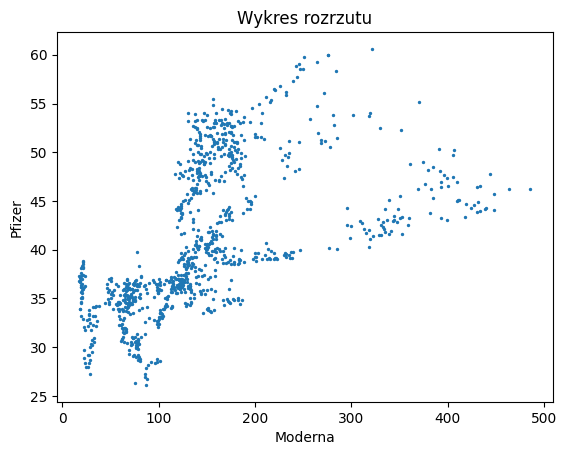

In [31]:
a, b = np.polyfit(Moderna_data, Pfizer_data, 1)

plt.scatter(Moderna_data, Pfizer_data, s=2)

plt.xlabel("Moderna")
plt.ylabel("Pfizer")
plt.title("Wykres rozrzutu")
plt.savefig("wykres_rozrzutu.png")
plt.show()

### Boxploty

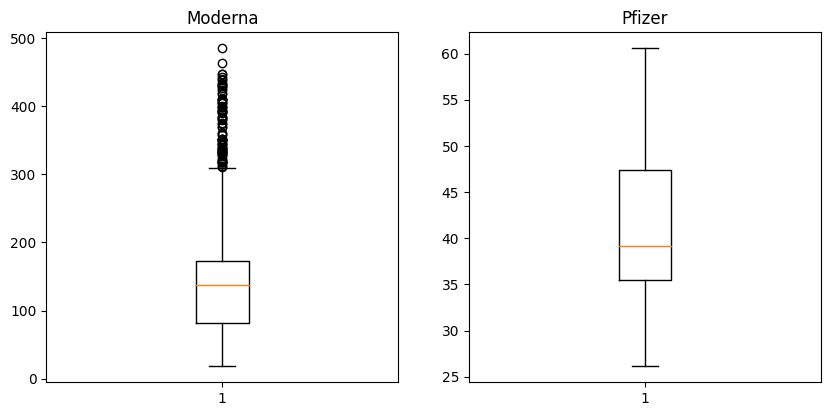

In [28]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.boxplot(Moderna_data)
plt.title("Moderna")

plt.subplot(2, 2, 2)
plt.boxplot(Pfizer_data)
plt.title("Pfizer")

plt.show()